
# 🤖 Predicting JAMB Scores using PyCaret (Regression)

This notebook uses PyCaret to build a regression model that predicts student JAMB scores based on features like attendance, school type, study hours, etc.


In [1]:

import pandas as pd
from pycaret.regression import *

df = pd.read_csv("jamb_exam_results.csv")
df = df.drop(columns=["Student_ID"])  # Remove irrelevant feature

# Setup PyCaret
reg_setup = setup(data=df, target='JAMB_Score', session_id=123, fold=3, verbose=True)


,Description,Value
0,Session id,123
1,Target,JAMB_Score
2,Target type,Regression
3,Original data shape,"(5000, 16)"
4,Transformed data shape,"(5000, 24)"
5,Transformed train set shape,"(3500, 24)"
6,Transformed test set shape,"(1500, 24)"
7,Numeric features,6
8,Categorical features,9
9,Rows with missing values,17.8%


In [2]:

# Compare models
best_model = compare_models(fold=3)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,31.7125,1554.7657,39.4255,0.3327,0.2292,0.1958,0.0833
ridge,Ridge Regression,31.7127,1556.2983,39.4448,0.3321,0.2293,0.1957,2.0433
lr,Linear Regression,31.7129,1556.3532,39.4454,0.3320,0.2294,0.1957,2.1833
lar,Least Angle Regression,31.7129,1556.3532,39.4454,0.3320,0.2294,0.1957,0.1333
huber,Huber Regressor,31.6776,1563.1563,39.5329,0.3290,0.2298,0.1941,0.1433
lasso,Lasso Regression,32.0752,1580.3512,39.7498,0.3217,0.2310,0.1983,1.9833
llar,Lasso Least Angle Regression,32.0752,1580.3519,39.7498,0.3217,0.2310,0.1983,0.0967
gbr,Gradient Boosting Regressor,32.1019,1600.4464,40.0033,0.3130,0.2316,0.1977,0.2467
en,Elastic Net,32.5492,1613.8329,40.1635,0.3077,0.2334,0.2015,0.0967
rf,Random Forest Regressor,33.1253,1690.9306,41.1193,0.2740,0.2383,0.2052,0.5767


In [3]:

# If compare_models fails, fallback to Random Forest
if not hasattr(best_model, "fit"):
    best_model = create_model('rf', fold=3)


In [4]:

# Tune and evaluate model
tuned_model = tune_model(best_model, fold=3)
evaluate_model(tuned_model)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,31.6175,1552.0048,39.3955,0.3474,0.2279,0.1953
1,32.5501,1616.9414,40.2112,0.3263,0.2332,0.1995
2,30.9709,1495.2825,38.6689,0.3245,0.2265,0.1925
Mean,31.7128,1554.7429,39.4252,0.3328,0.2292,0.1958
Std,0.6482,49.7047,0.6300,0.0104,0.0029,0.0029


Fitting 3 folds for each of 10 candidates, totalling 30 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

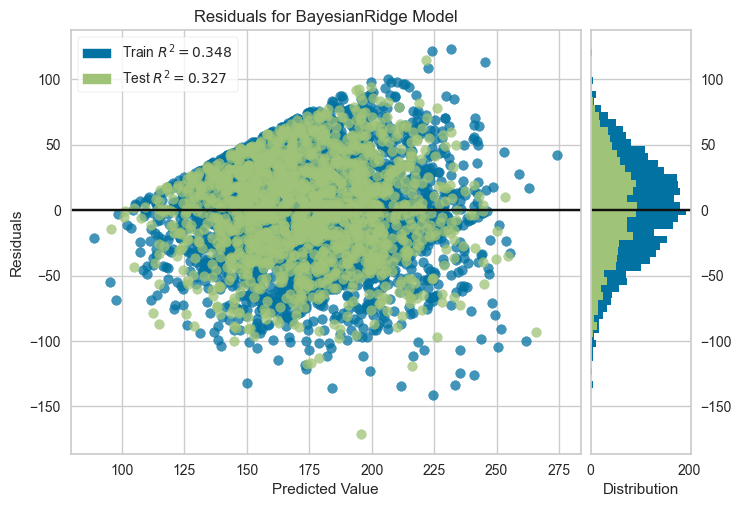

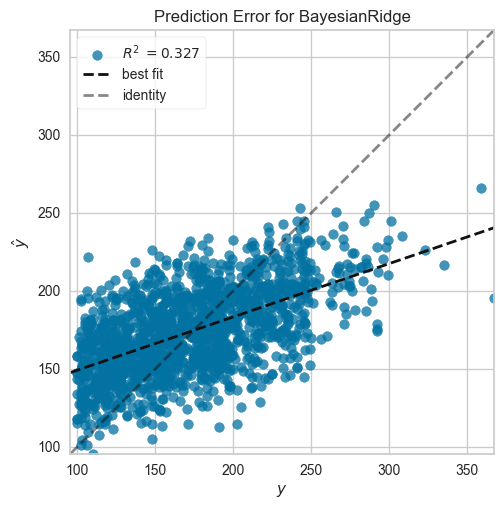

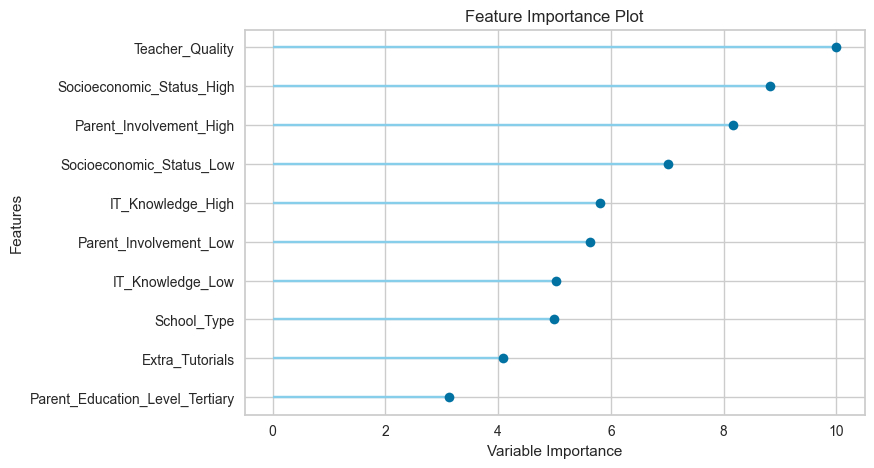

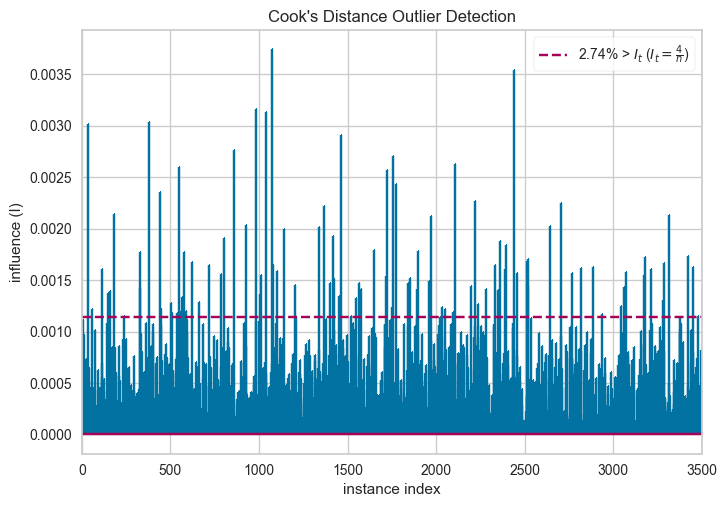

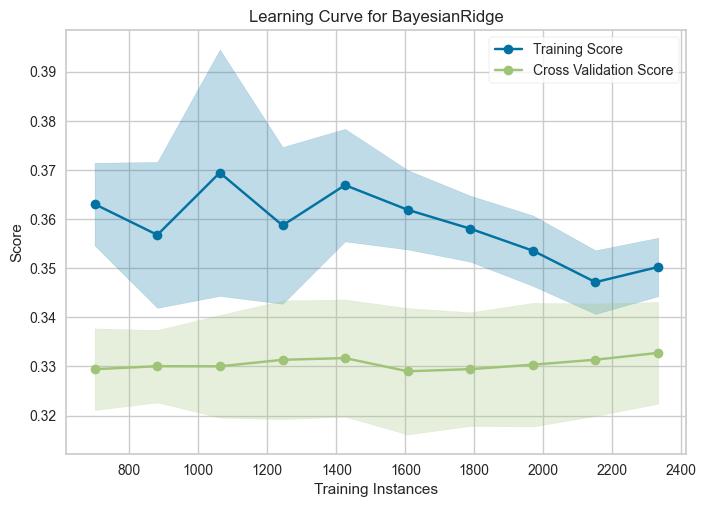

In [7]:
# 📊 Plot common evaluation visuals for the tuned model
plot_model(tuned_model, plot='residuals')       # Residuals plot
plot_model(tuned_model, plot='error')           # Prediction error
plot_model(tuned_model, plot='feature')         # Feature importance
plot_model(tuned_model, plot='cooks')           # Influence of outliers
plot_model(tuned_model, plot='learning')        # Learning curve


In [5]:

# Save model
save_model(tuned_model, 'JAMB_Regression_Model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Study_Hours_Per_Week',
                                              'Attendance_Rate',
                                              'Teacher_Quality',
                                              'Distance_To_School', 'Age',
                                              'Assignments_Completed'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['School_Type', 'School_Location',
                                              'Extra_Tutorials',
                                              'Access_To_Lea...
                  TransformerWrapper(include=['Parent_Involvement',
                                              'IT_Knowledge',
                                              'Socioeconomic_Status',
                                              'Parent_Ed